###### Here in this project I've to make prediction about Fake news and since we all know that the news are basically written in the form of text and the text size used to be very large in nature thereby here in this project i will be using LSTM-RNN Deep NLP technique for predicting the fake news.

In [1]:
#importing the basic statistics and data visualization techniques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
#uploading the 1st dataset
TRUE=pd.read_csv('True.csv')
TRUE

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [13]:
#adding one column as target variable having entries as 1 for this dataset
TRUE['label']=1

In [15]:
TRUE.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [10]:
#uploading the 2nd dataset
Fake=pd.read_csv('Fake.csv')
Fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [14]:
#adding one column as target variable having entries as 0 for this dataset
Fake['label']=0

In [16]:
Fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [27]:
#appending both the datasets to get final dataframe
df=TRUE.append(Fake,ignore_index=True)
df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [28]:
df.tail()

,title,text,subject,date,label
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [29]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [30]:
print('Row"s are',df.shape[0])
print('Columns are',df.shape[1])
print('Shape is',df.shape)

Row"s are 44898
Columns are 5
Shape is (44898, 5)


In [50]:
df.dtypes

title      object
text       object
subject    object
date       object
label       int64
dtype: object

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [32]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

###### This dataset doesn't have any null values in it. --------

<AxesSubplot:xlabel='label', ylabel='count'>

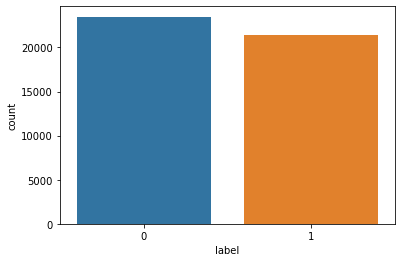

In [33]:
#plotting our target variable 'label' to check it's count for each class
sns.countplot(df.label)

In [90]:
df.label.value_counts()

0    23481
1    21417
Name: label, dtype: int64

##### 1 represents True news 
##### 0 represents Fake news
so in our dataset fake news are more in number as that of true news.

In [37]:
#extracting the information
df.loc[65] #This will give all the data present in 65th row

title      Senator Cornyn trying to get Big Corn behind U...
text       (Reuters) - Senator John Cornyn, the No. 2 Sen...
subject                                         politicsNews
date                                      December 20, 2017 
label                                                      1
Name: 65, dtype: object

In [44]:
df.title.loc[49] #This will give title column data present in 49th row

'Spy chiefs pressure Congress to renew expiring surveillance law'

In [45]:
df.subject.loc[49] #This will give subject column data present in 49th row

'politicsNews'

In [46]:
df.label.loc[49] #This will give label column data present in 49th row

1

In [47]:
df.date.loc[49] #This will give date column data present in 49th row

'December 21, 2017 '

In [48]:
df.text.loc[49] #This will give text column data present in 49th row

'WASHINGTON (Reuters) - The leaders of the U.S. intelligence community on Thursday pressed Congress to renew the National Security Agency’s expiring surveillance law, warning in a rare public statement that national security may be endangered if lawmakers let it lapse. The message from the intelligence chiefs sought to apply pressure on lawmakers who appeared to abandon an effort this week to pass legislation that would have reauthorized for several years the NSA’s warrantless internet spying program, which is due to expire on Dec. 31. That plan cratered late on Wednesday amid objections from a sizable coalition of Republicans and Democrats who want to have more privacy safeguards in the program, which chiefly targets foreigners but also collects communications from an unknown number of Americans. Instead, House Republicans unveiled a stopgap funding measure on Thursday that includes an extension of the surveillance law until Jan. 19. The law, known as Section 702 of the Foreign Intell

In [51]:
#will see the uniqueness present in dataset
df.nunique()

title      38729
text       38646
subject        8
date        2397
label          2
dtype: int64

In [70]:
#will check value counts in each columns
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [86]:
#here we can rename the .politics. column into 'politicsNews' as both are same in nature
df['subject'].replace({"politics" : "politicsNews"},inplace=True)

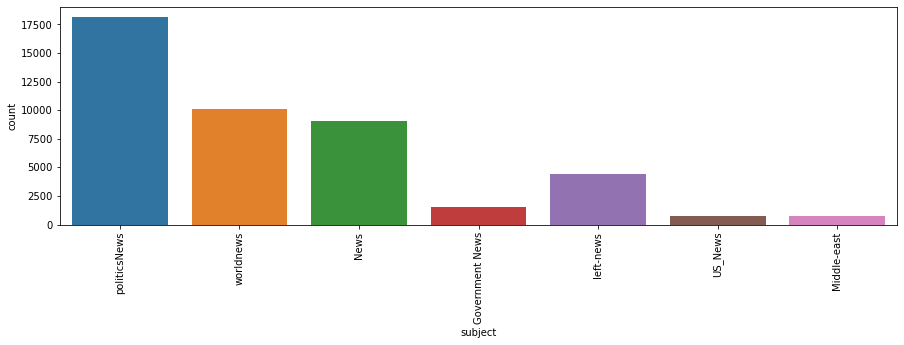

In [87]:
#we can check the counts for each type of news
plt.figure(figsize=(15,4))
sns.countplot(df.subject)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [91]:
#represents dataframe for fake news
df[df.label==0]

,title,text,subject,date,label
21417,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
21418,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
21419,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
21420,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
21421,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [93]:
#represents dataframe for True news
df[df.label==1]

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [98]:
#represents dataframe for those true news which having subject as politicsNews
df[(df['label']==1) & (df['subject']=='politicsNews')]

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
11267,Obama says willing to work with Republican Spe...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"January 13, 2016",1
11268,Obama says Islamic State fight far from 'World...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"January 13, 2016",1
11269,Chelsea Clinton stands her mother's ground in ...,"MANCHESTER, N.H. (Reuters) - U.S. Democratic p...",politicsNews,"January 13, 2016",1
11270,Obama jokes about a Trump State of the Union a...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"January 13, 2016",1


In [103]:
#represents dataframe for those fake news which having subject as politicsNews
df[(df['label']==0) & (df['subject']=='politicsNews')]

,title,text,subject,date,label
30467,Democrat Senator Warns Mueller Not To Release ...,"According to The Hill, Democrat Senator Bob Ca...",politicsNews,19-Feb-18,0
30468,MSNBC ANCHOR Flabbergasted at What Texas Teach...,If we protect every other government building ...,politicsNews,19-Feb-18,0
30469,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,politicsNews,19-Feb-18,0
30470,JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...,Just one more reminder of why President Trump ...,politicsNews,18-Feb-18,0
30471,DOJ’s JEFF SESSIONS Opens Investigation Into W...,Thank goodnesss Jeff Sessions is moving on fin...,politicsNews,18-Feb-18,0
...,...,...,...,...,...
37303,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,politicsNews,"Mar 31, 2015",0
37304,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",politicsNews,"Mar 31, 2015",0
37305,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,politicsNews,"Mar 31, 2015",0
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politicsNews,"Mar 31, 2015",0


In [105]:
#represents dataframe for those fake news which having date as Mar 31, 2015
df[(df['label']==0) & (df['date']=='Mar 31, 2015')]

,title,text,subject,date,label
37302,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,politicsNews,"Mar 31, 2015",0
37303,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,politicsNews,"Mar 31, 2015",0
37304,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",politicsNews,"Mar 31, 2015",0
37305,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,politicsNews,"Mar 31, 2015",0
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politicsNews,"Mar 31, 2015",0
37307,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,politicsNews,"Mar 31, 2015",0
43335,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",left-news,"Mar 31, 2015",0
43336,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,left-news,"Mar 31, 2015",0


In [112]:
#represents dataframe for those fake news which having date as January 16, 2016
df[(df['label']==0) | (df['date']=='January 16, 2016')]

,title,text,subject,date,label
21417,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
21418,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
21419,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
21420,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
21421,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [113]:
# importing datetime library
import datetime

In [117]:
#we can check current date and time ###this is only for fun ## one can easily know the commencement of this project
datetime.datetime.now()

datetime.datetime(2023, 1, 3, 11, 18, 59, 310325)

##### see going forward i need only two columns title and its label rest i can ignore or delete as those are not really important at all. Here I'm not using text column as feature variable because the length of each documents could be very large and that too will take long time while performing text preprocessing part hence i'm ignoring this column.

In [123]:
#droping below columns from dataset
df.drop(['text','subject','date'],axis=1,inplace=True)
df.head()

,title,label
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [124]:
#seperating feature and target vriable
x=df.drop('label',axis=1) #feature
y=df.label #target

In [126]:
x.head(),y.head()

(                                               title
 0  As U.S. budget fight looms, Republicans flip t...
 1  U.S. military to accept transgender recruits o...
 2  Senior U.S. Republican senator: 'Let Mr. Muell...
 3  FBI Russia probe helped by Australian diplomat...
 4  Trump wants Postal Service to charge 'much mor...,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: label, dtype: int64)

### Going forward will be Using NLP with Deep Learning

In [131]:
import nltk #NLP libraries with respect to machine learning
import re   #Regular Expression
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [132]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

##### I'll be using here stemming technique not lemmatization as we are not making project for any particular text summarization or language translation where the output need to be well organized

In [133]:
from nltk.stem.porter import PorterStemmer #stemming_class 
ps=PorterStemmer()                             

In [134]:
#dataset preprocessing
#creating corpus to contain all the sentences or documents
corpus=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-Z0-9]', ' ',df['title'][i])  #removing all the special character from the sentences except lower and upper case alphabets and also numeric
    review.lower() #lowering each sentences
    review.split() #spliting
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')] #using stemming so that each word gets some related words that could not be meaningful and we are ignoring the words that are in stopwords.words('english')
    review=' '.join(review) #joining
    corpus.append(review)   #appending the list
corpus

['a   u   s     b u g e   f g h   l     r e p u b l c n   f l p   h e r   f c l   c r p',
 'u   s     l r     c c e p   r n g e n e r   r e c r u   n   m n     p e n g n',
 's e n r   u   s     r e p u b l c n   e n r       l e   m r     m u e l l e r     h   j b  ',
 'f b i   r u   p r b e   h e l p e   b   a u r l n   p l   p   f f     n y t',
 't r u p   w n   p l   s e r v c e     c h r g e     u c h   r e     f r   a z n   h p e n',
 'w h e   h u e     c n g r e   p r e p r e   f r   l k   n   p e n n g     g r n',
 't r u p     r u   p r b e   w l l   b e   f r     b u   e l n e   u n c l e r     n y t',
 'f c b x     t r u p   n   t w e r     d e c   2 9         a p p r v l   r n g     a z n',
 't r u p   n   t w e r     d e c   2 8         g l b l   w r n g',
 'a l b   f f c l     c e r f   s e n r   e l e c   j n e     e p e   c h l l e n g e     c n n',
 'j n e   c e r f e   u   s     s e n e   w n n e r   e p e   m r e   c h l l e n g e',
 'n e w   y r k   g v e r n r   q u 

In [135]:
len(corpus)

44898

### Deep Learning Techniques

In [127]:
!pip install tensorflow #installing tensorflow as it's not pre-installed in python

##### TensorFlow is an open source framework developed by Google researchers to run machine learning, deep learning and other statistical and predictive analytics workloads. It develops neural networks faster and easier.
Being an Open-Source library for deep learning and machine learning, TensorFlow plays a role in text-based applications, image recognition, voice search, and many more. 
##### For instance DeepFace, Facebook's image recognition system, uses TensorFlow for image recognition. It is used by Apple's Siri for voice recognition

In [128]:
#importing tensorflow
import tensorflow as tf
print(tf.__version__)

2.11.0


##### Keras is a high-level, deep learning API developed by Google for implementing neural networks.
Keras is an open-source software library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library. It is written in Python and is used to make the implementation of neural networks easy.
##### Tensorflow and Keras provide high-level APIs used for easily building and training models, but Keras is more user-friendly because it's built-in Python.

In [129]:
#importing Deep-NLP Libraries
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.text import one_hot #encoding technique converts text in to vector
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

## Embeddings 
are a great way to deal with NLP problems because of two reasons. First it helps in dimensionality reduction over one-hot encoding as we can control the number of features. Second it is capable of understanding the context of a word so that similar words have similar embeddings.

### LSTM
Long Short Term Memory Networks is an advanced RNN, a sequential network, that allows information to persist. It is capable of handling the vanishing gradient problem faced by RNN. A recurrent neural network is also known as RNN and is used for persistent short term memory.

### Dense
In any neural network, a dense layer is a layer that is deeply connected with its preceding layer which means the neurons of the layer are connected to every neuron of its preceding layer. This layer is the most commonly used layer in artificial neural network networks. In Keras, "dense" usually refers to a single layer

### Dropout
It refers to dropping out the nodes (input and hidden layer) in a neural network to control overfitting problem

### One-hot Encoding
converts text into vector

### Padding
To ensure that all the input sequence data is having the same length we pad or truncate the input data points

### Sequential
In Keras it usually refers to an entire model, not just one layer. Sequential refers to the way we build models in Keras using the sequential api . Sequential API is used to create models layer-by-layer. In sequential models, the input, hidden and output layers are stacked in the model sequentially . The information propagates from the input to the output through hidden layers.

In [130]:
#setting the vocabulary size
voc_size=5000

### Using One Hot Encoding
###### keras provides the one_hot() function that creates a hash/index of each word of a document as an efficient integer encoding

In [136]:
#integer encoding of each document
onehot=[one_hot(words,voc_size) for words in corpus]
onehot

[[1520,
  3673,
  1362,
  130,
  3673,
  4974,
  3864,
  4578,
  4974,
  1205,
  3141,
  2938,
  3864,
  1928,
  3673,
  130,
  3141,
  236,
  3048,
  4578,
  3141,
  1928,
  1205,
  3864,
  2938,
  4578,
  236,
  3141,
  236,
  2938,
  1928],
 [3673,
  1362,
  3141,
  2938,
  236,
  236,
  3864,
  1928,
  2938,
  3048,
  4974,
  3864,
  3048,
  3864,
  2938,
  2938,
  3864,
  236,
  2938,
  3673,
  3048,
  3684,
  3048,
  1928,
  3864,
  3048,
  4974,
  3048],
 [1362,
  3864,
  3048,
  2938,
  3673,
  1362,
  2938,
  3864,
  1928,
  3673,
  130,
  3141,
  236,
  3048,
  3864,
  3048,
  2938,
  3141,
  3864,
  3684,
  2938,
  3684,
  3673,
  3864,
  3141,
  3141,
  3864,
  2938,
  1205,
  4625,
  130],
 [4578,
  130,
  4369,
  2938,
  3673,
  1928,
  2938,
  130,
  3864,
  1205,
  3864,
  3141,
  1928,
  3864,
  130,
  1520,
  3673,
  2938,
  3141,
  3048,
  1928,
  3141,
  1928,
  4578,
  4578,
  3048,
  4066,
  4960],
 [4960,
  2938,
  3673,
  1928,
  3228,
  3048,
  1928,
  3141,
  

##### The sequences for each documents have different lengths and keras prefers inputs to be vectorized and all inputs to have the same length. Thereby we will pad all the input sequences to have the length of 50 words(lets assume). 

In [137]:
#4000th document
corpus[4000]

'u   s     c n g r e   p e   h r   e r   b l l     v e r   g v e r n e n   h u w n'

In [138]:
#integer encoding of each words of 4000th document. it basically represent the index of each word inside the document.
onehot[4000]

[3673,
 1362,
 236,
 3048,
 4974,
 2938,
 3864,
 1928,
 3864,
 1205,
 2938,
 3864,
 2938,
 130,
 3141,
 3141,
 1413,
 3864,
 2938,
 4974,
 1413,
 3864,
 2938,
 3048,
 3864,
 3048,
 1205,
 3673,
 3228,
 3048]

In [142]:
#Pad documents to a max_length of 50 words for each documents
sent_length=50
padded_docs=pad_sequences(onehot,padding='pre',maxlen=sent_length)
print(padded_docs)

[[   0    0    0 ...  236 2938 1928]
 [   0    0    0 ... 3048 4974 3048]
 [   0    0    0 ... 1205 4625  130]
 ...
 [   0    0    0 ... 3048 1362 2938]
 [   0    0    0 ... 3141 3585 3673]
 [   0    0    0 ... 1362 3673 3048]]


### We are now ready to define our Embedding layer as part of our neural network model. 
##### The Embedding has a vocabulary of 5000 and an input length of 50. We will choose a embedding space i.e our output dimension as of 100 dimensions. The model is a simple binary classification model. 
##### The output from the embedding layer will be 50 vectors of 100 dimension each,one for each word.

In [143]:
#document 9 have 50 words in it
padded_docs[9]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 1520, 3141,  130, 4578, 4578,  236, 3141,  236,
       3864, 2938, 4578, 1362, 3864, 3048, 2938, 3864, 3141, 3864,  236,
       4625, 3048, 3864, 3864, 1928, 3864,  236, 1205, 3141, 3141, 3864,
       3048, 4974, 3864,  236, 3048, 3048])

In [144]:
#document 10000 have 50 words in it
padded_docs[10000]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0, 1520, 2938,
       4020, 3048, 3048,  236, 1205, 3141, 3141, 3864, 3048, 4974, 3864,
       1928, 2938, 2938, 2938, 3864, 3673, 3141, 3141, 3141, 3864, 4974,
       3048, 4974,  236, 3048, 3673,  236])

In [145]:
#define the model
embedding_vector_features=100 #length of the vector for each word
model=Sequential()
model.add(Embedding(input_dim=voc_size,output_dim=embedding_vector_features,input_length=sent_length)) #hidden layer
model.add(Dropout(0.3)) #30 % unuseful neuron will get disconnected to control the overfitting
model.add(LSTM(300)) #it will have a layer of 300 'smart neurons' and the output will be a vector of 300 dimensions #hidden layer
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid')) #output layer
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           500000    
                                                                 
 dropout (Dropout)           (None, 50, 100)           0         
                                                                 
 lstm (LSTM)                 (None, 300)               481200    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense (Dense)               (None, 1)                 301       
                                                                 
Total params: 981,501
Trainable params: 981,501
Non-trainable params: 0
_________________________________________________________________
None


In [146]:
#converting variables into array
x_final=np.array(padded_docs) #independent variable
y_final=np.array(y) #label

In [147]:
x_final

array([[   0,    0,    0, ...,  236, 2938, 1928],
       [   0,    0,    0, ..., 3048, 4974, 3048],
       [   0,    0,    0, ..., 1205, 4625,  130],
       ...,
       [   0,    0,    0, ..., 3048, 1362, 2938],
       [   0,    0,    0, ..., 3141, 3585, 3673],
       [   0,    0,    0, ..., 1362, 3673, 3048]])

In [148]:
y_final

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [149]:
x_final.shape,y_final.shape

((44898, 50), (44898,))

In [150]:
#model_selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_final,y_final,test_size=0.20,random_state=42)

### Fit the model

In [169]:
%%time
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10, batch_size=100)

Epoch 1/10
360/360 [==============================] - 675s 2s/step - loss: 0.0612 - accuracy: 0.9790 - val_loss: 0.0594 - val_accuracy: 0.9806
Epoch 2/10
360/360 [==============================] - 660s 2s/step - loss: 0.0573 - accuracy: 0.9805 - val_loss: 0.0606 - val_accuracy: 0.9793
Epoch 3/10
360/360 [==============================] - 680s 2s/step - loss: 0.0538 - accuracy: 0.9812 - val_loss: 0.0550 - val_accuracy: 0.9822
Epoch 4/10
360/360 [==============================] - 656s 2s/step - loss: 0.0496 - accuracy: 0.9834 - val_loss: 0.0648 - val_accuracy: 0.9806
Epoch 5/10
360/360 [==============================] - 660s 2s/step - loss: 0.0458 - accuracy: 0.9841 - val_loss: 0.0512 - val_accuracy: 0.9818
Epoch 6/10
360/360 [==============================] - 653s 2s/step - loss: 0.0426 - accuracy: 0.9852 - val_loss: 0.0534 - val_accuracy: 0.9836
Epoch 7/10
360/360 [==============================] - 766s 2s/step - loss: 0.0395 - accuracy: 0.9864 - val_loss: 0.0512 - val_accuracy: 0.9817

### Predict the model

In [170]:
%%time
#performance metrics
y_pred=model.predict(x_test)

281/281 [==============================] - 104s 368ms/step
Wall time: 1min 44s


In [171]:
#Classification metrics can't handle a mix of binary and continuous targets,so will covert in 0 and 1 only
y_pred=np.where(y_pred>0.5,1,0)

In [199]:
y_pred.T

array([[0, 0, 0, ..., 0, 1, 1]])

In [172]:
%%time
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

Wall time: 0 ns


In [173]:
%%time
accuracy_score(y_test,y_pred) #testing accuracy

Wall time: 17 ms


0.984521158129176

In [174]:
%%time
confusion_matrix(y_test,y_pred)

Wall time: 31 ms


array([[4579,   71],
       [  68, 4262]], dtype=int64)

### False Positive (FP) – Type 1 error

The predicted value was falsely predicted.

The actual value was negative(0) but the model predicted a positive value (1,True News) 71 times
Also known as the Type 1 error
### False Negative (FN) – Type 2 error

The predicted value was falsely predicted.

The actual value was positive(1) but the model predicted a negative value(0,Fake News) 68 times
Also known as the Type 2 error

In [175]:
%%time
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4650
           1       0.98      0.98      0.98      4330

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980

Wall time: 220 ms


### Precision vs. Recall vs. F-1 Score
### Precision tells us how many of the correctly predicted cases actually turned out to be positive.

for fake news(0)- 99 of the correctly predicted cases actually turned out to be positive(Fake news).

for True news(1)- 98 of the correctly predicted cases actually turned out to be positive(True news).

### Recall tells us how many of the actual positive cases we were able to predict correctly with our model.

for fake news(0)- 98 of the actual positive cases (Fake news) we are able to predict correctly with our model.

for True news(1)- 98 of the actual positive cases (True news) we are able to predict correctly with our model.

### F-1 Score is basically the harmonic mean of Precision and recall

for fake news(0)- 99%

for True news(1)- 98%

## Summarize history for Accuarcy and Loss

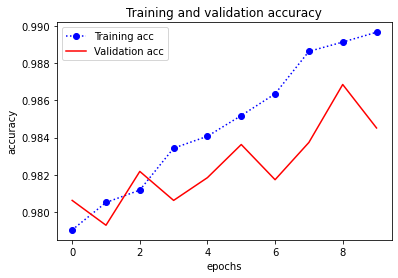

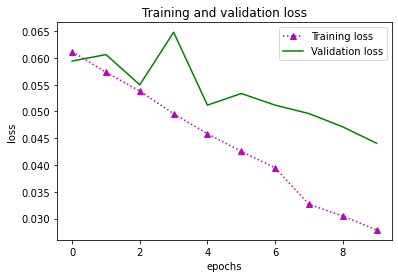

In [196]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'ob:', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='best')
 
plt.figure()
 
plt.plot(epochs, loss, '^m:', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='best')
 
plt.show()

### Conclusion
At each epoch our model training loss is getting decreasing and training accuracy is getting increasing which shows that our model is performing well with LSTM RNN neural networks and its giving testing accuracy as 98% which is an excellent accuracy.
Also validation loss and validation accuracy is almost similar to that of Training loss and Training accuracy respectively,which indicates this model was a perfect fit for predicting fake news.

##### The training loss indicates how well the model is fitting the training data, while the validation loss indicates how well the model fits new data

##### Training Accuracy: How the model is able to classify the two output during training on the training dataset. Valid Accuracy: How the model is able to classify the outputs with the validation dataset.

---

---

---

---

---